<a href="https://colab.research.google.com/github/dniboghgnis/Tensorboard-101/blob/master/CNNModelSample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import matplotlib.pyplot as plt

In [29]:
# Load the Fashion-MNIST dataset and normalize

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()
train_images=train_images/255
train_labels=pd.get_dummies(data=train_labels)
test_labels=pd.get_dummies(data=test_labels)

In [30]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [31]:
cnn_model_1=Sequential()
cnn_model_1.add(Conv2D(filters=16,kernel_size=(3,3),kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.25),bias_initializer=tf.keras.initializers.Zeros,activation=tf.keras.activations.sigmoid,input_shape=(28,28,1)))
cnn_model_1.add(MaxPool2D(pool_size=(2,2),name='test_pooling_layer'))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(units=10,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.25),bias_initializer=tf.keras.initializers.Zeros,activation=tf.keras.activations.softmax))
print(cnn_model_1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
test_pooling_layer (MaxPooli (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                27050     
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
cnn_model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.MeanAbsolutePercentageError()])

In [33]:
history_model_1=cnn_model_1.fit(x=train_images[...,np.newaxis],y=train_labels,epochs=5,batch_size=256)

Epoch 1/5
235/235 [==============================] - 13s 55ms/step - loss: 2.8453 - categorical_accuracy: 0.2289 - mean_absolute_percentage_error: 85442060.5424
Epoch 2/5
235/235 [==============================] - 12s 53ms/step - loss: 1.0059 - categorical_accuracy: 0.6613 - mean_absolute_percentage_error: 53217844.4407
Epoch 3/5
235/235 [==============================] - 13s 54ms/step - loss: 0.7550 - categorical_accuracy: 0.7324 - mean_absolute_percentage_error: 39784483.8644
Epoch 4/5
235/235 [==============================] - 13s 54ms/step - loss: 0.6571 - categorical_accuracy: 0.7657 - mean_absolute_percentage_error: 34631175.9153
Epoch 5/5
235/235 [==============================] - 13s 53ms/step - loss: 0.6046 - categorical_accuracy: 0.7821 - mean_absolute_percentage_error: 32013386.6356


In [34]:
cnn_model_1.evaluate(x=test_images[...,np.newaxis],y=test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.7083 - categorical_accuracy: 0.5577 - mean_absolute_percentage_error: 46301208.0000


[1.708269715309143, 0.557699978351593, 46301208.0]

Trouser
[[3.3282193e-03 9.6279508e-01 4.8208251e-04 2.7398551e-03 2.6603431e-02
  5.1601779e-07 3.9741592e-03 2.2435256e-06 7.4140924e-05 3.1843791e-07]]


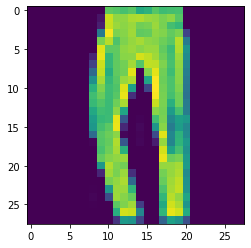

In [46]:
temp=test_images[5]/255

print(labels[np.argmax(cnn_model_1.predict(x=temp[np.newaxis,...,np.newaxis]))])
print(cnn_model_1.predict(x=temp[np.newaxis,...,np.newaxis]))
plt.imshow(test_images[5]/255)
plt.show()